# Exploring Hacker News Posts



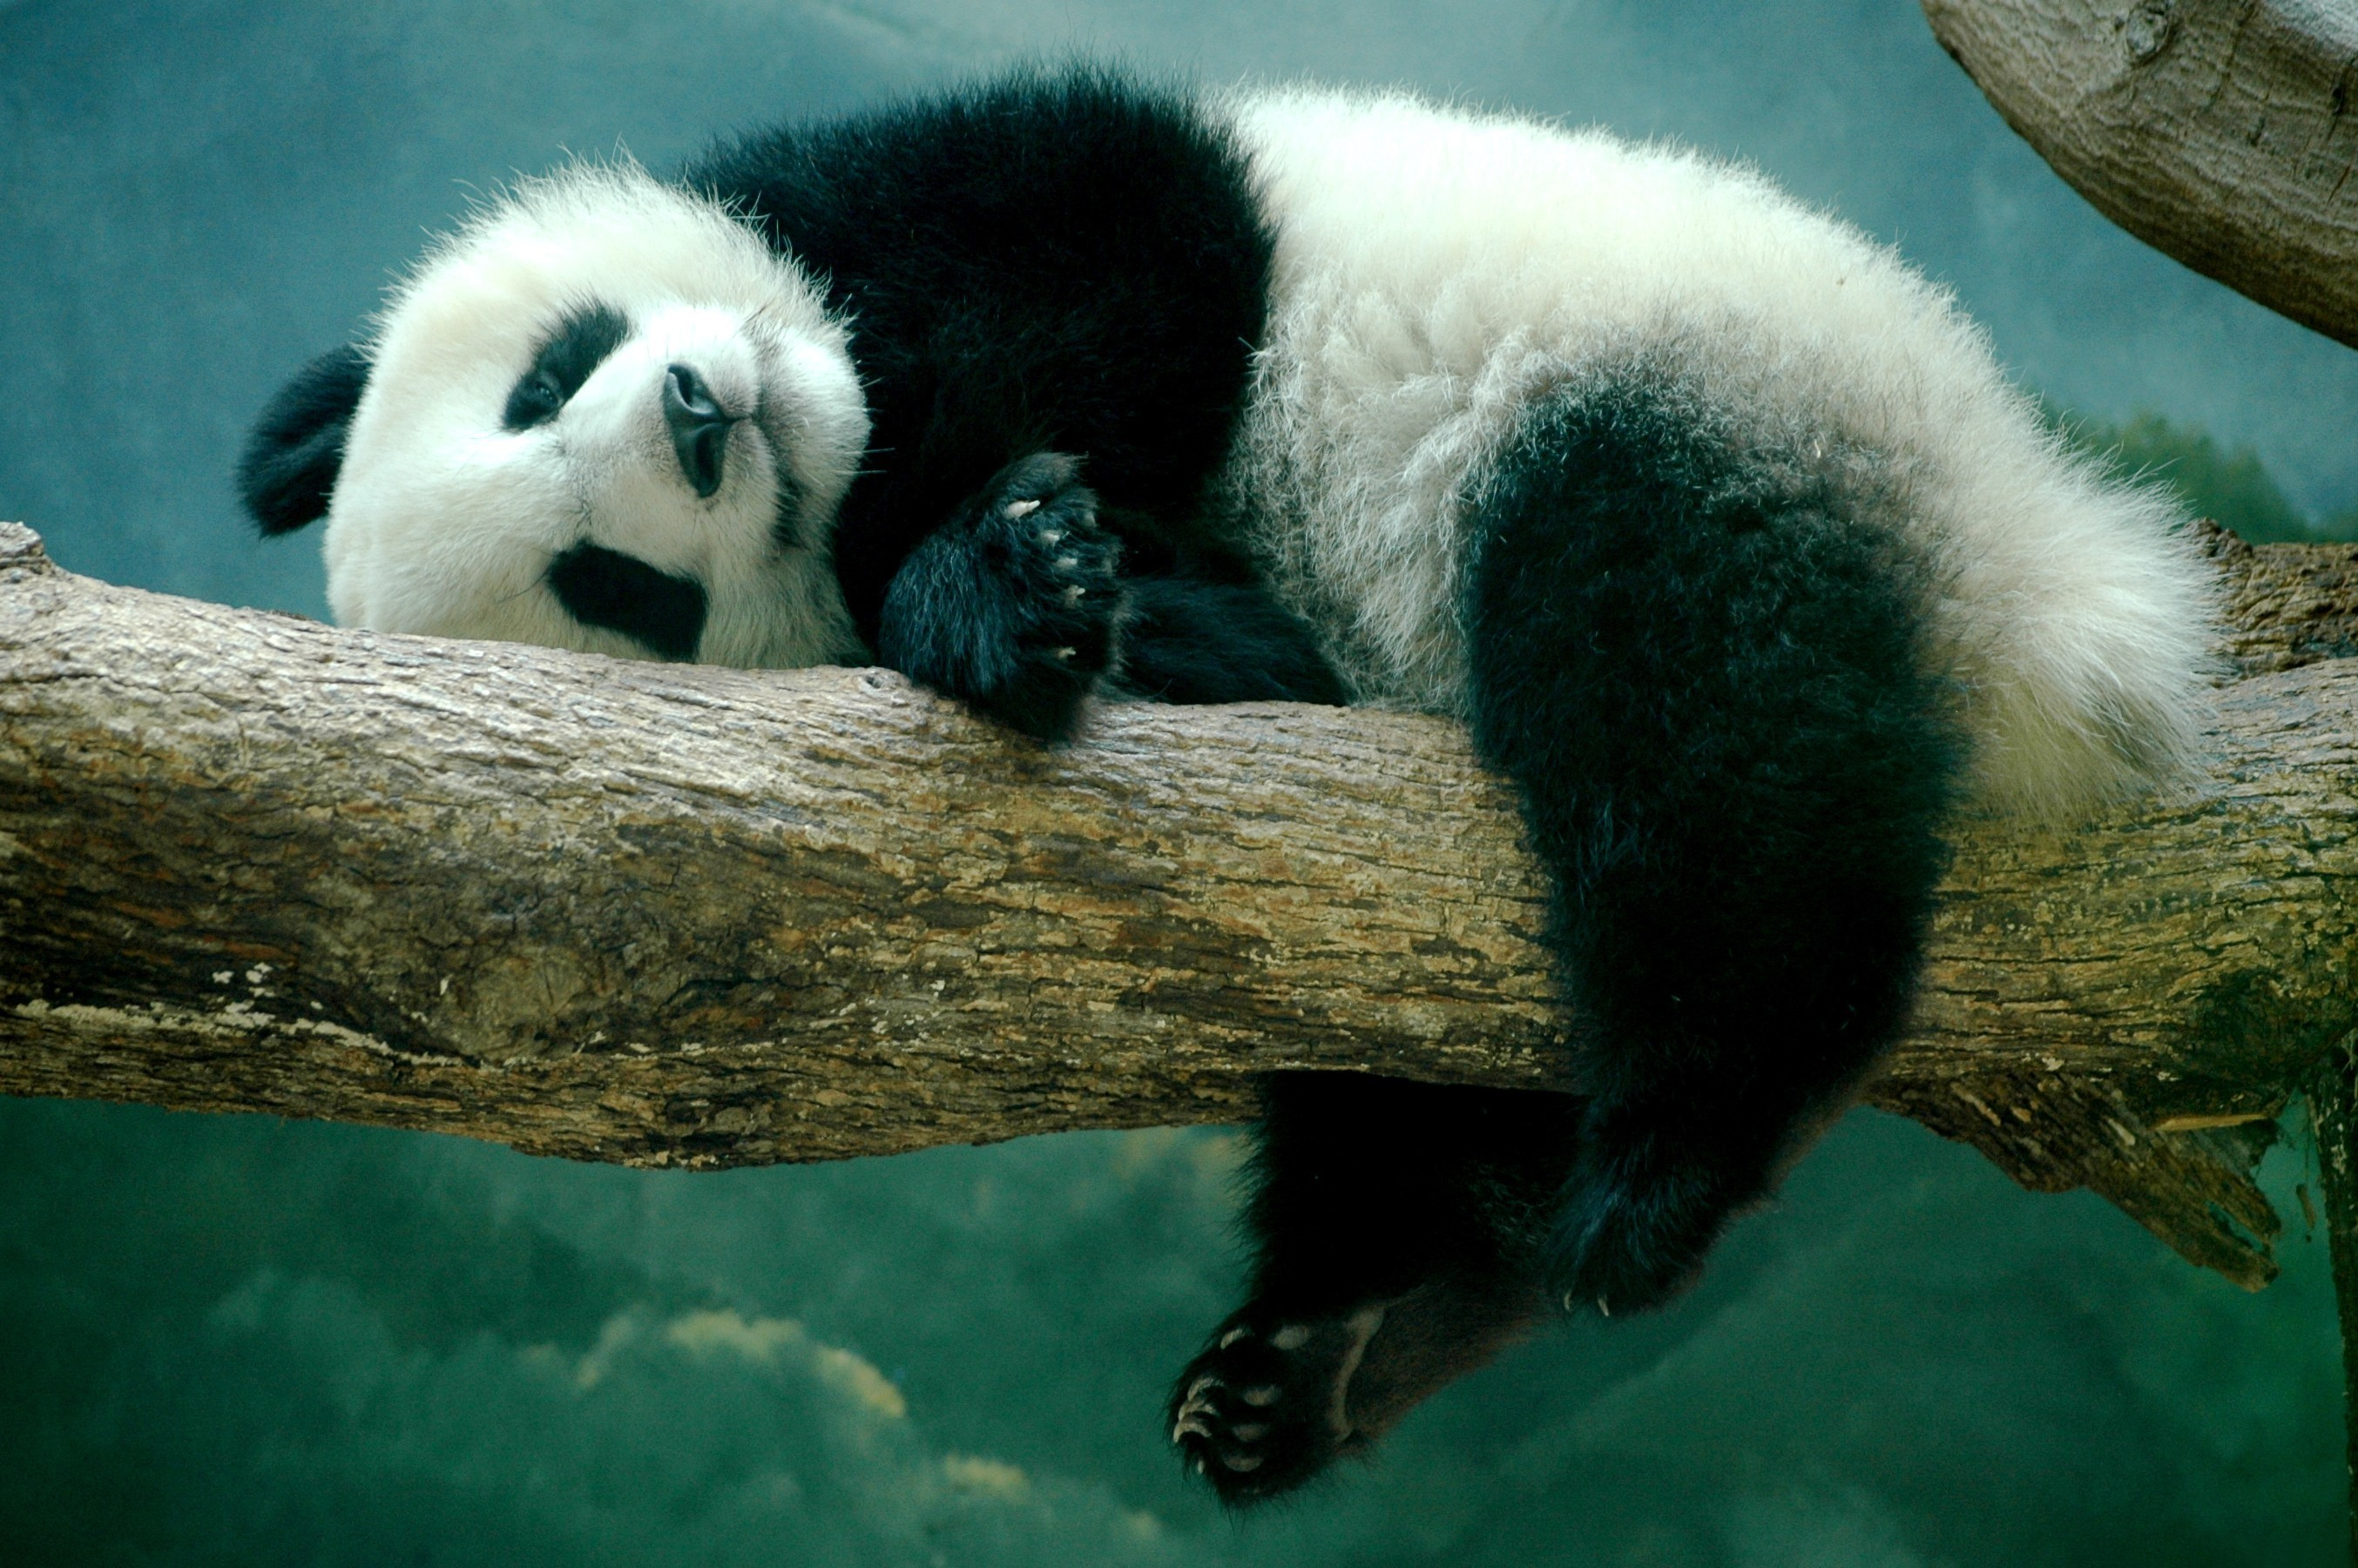


## Introduction

`The main goal of this project - analyze dataset with Python standard library, without specialized Python libraries for dataframes and arrays like Pandas, Numpy and etc.`

In this project, we'll work with a data set of submissions to popular technology site <a href="https://news.ycombinator.com/" target="_blank">Hacker News</a> .
We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. You can download dataset from <a href="https://www.kaggle.com/hacker-news/hacker-news-posts" target="_blank"> Kaggle</a>, but in this project I  using cleaned dataset from `mission 356` from the <a href="https://www.dataquest.io/" target="_blank">dataquest.io</a>     

I divide this project to two parts:
***
**Part 1. Separate data to three datasest required the  custom criteries and collect general statistic.**
        
**Part 2. Collect detailed  information of date and time dispersion.** 
***
Lets go to Part 1.

## Part 1. Separate data to three datasest required the  custom criteries and collect general statistic.
Load functions requiring for extracting dataset from csv file:

In [1]:
def extract_variable_name(variable_name):
    """
    Help on extr_var_name:
    Extract name of variable of from global space name and return it.  
    Required  argument- object name
    """
    try:
        for name in globals():
            
            if eval(name) == variable_name:
                return name
    
    except Exception as X:
        return ("\nError {} in function extract_variable_name(). ".format(X))


def csv_reader(csv_name, header = True):
    from csv import reader
    """
    Help on custom csv_reader:
    Open cvs file  and return data as lists.
    Required   arguments - csvname and False:
    1. With defaults arguments returns two separate lists - header as  list[0:1]
    and list with data as list[1:].
    2. With one argument csvfile returns list containing header as list[:]   
    Module csv using for export csv files to list
    """ 
    try:
        open_file = open(csv_name)
        read_file = reader(open_file)
        data = list(read_file)
 
        if header:
            return data[0], data[1:]
        
        return data
    except Exception as X:
        print("\nError {} in function csv_reader()!".format(X))

        
def list_veiwer(list_name, start = 0, end = 0):
    """
    Help on custom function list_veiwer (list_name(list), start(int) , end (int)):
    Takes in list and returns detailed information about it and optional views
    defined range elements or columns.
    Required   arguments -   one or three:
    1. list_name returns general information about list and views first row.
    2. list_veiwer(list, start, end) returns general information about list
    and view rows between start and end-1.
    Convert negative index to positive index.
    For print use * arg and sep ="\n"
    """
    try:
        tested_list = list_name[:]
        rows = len(tested_list)
        name_list = extract_variable_name(tested_list)
        if not rows:
            return "The {} is a empty list with zero rows and columns!"\
                .format(name_list), tested_list 
        
        if not isinstance(tested_list[0], list):
            elements = len(tested_list)
            if elements > 101:
                print_limit = 100
            else:
                print_limit = elements
            return "The {} is a single row list contains {:,} elements.\nView \
first {} element".format(name_list, elements, print_limit),\
                    tested_list[:print_limit]
        
        columns = len(tested_list[0])
        
        if start == 0 and end == 0:
            elements = len(tested_list[0])
            if elements > 101:
                print_limit = 100
            else:
                print_limit = elements
            return "The {} is a list contains {:,} rows and {:,} columns.\
\nView its first row".format(name_list, rows, columns), tested_list[0]
        
        if  start == end and start !=0 and end !=0:
            elements = len(tested_list[start])
            if elements > 101:
                print_limit = 100
            else:
                print_limit = elements
            return "Entered start and end are same!The  {} contains {:,} row  and\
{:,} columns. View first row:".format(name_list, rows, columns),\
                                 tested_list[start][:print_limit]
        
        if start < 0:
            start = start + rows
        if end < 0:
            end = end + rows
        
        if start > end:
            return "Entered start greater than end! The  {} is a list contains {:,}\
row  and {:,} columns. View first row:".format(name_list, rows, columns),\
                                         tested_list[0]
        
        return_list =["The  {} list contains {:,} rows  and {:,} columns\
\nView rows from {:,} to {}".format(name_list, rows, columns,start, end-1)]
        row_no = [a for a in range(start, end)]
        for i in row_no:
            return_list.append(tested_list[i]) 
        return return_list
    except Exception as X:
        return  "\nError for {}: {} in function list_veiwer()!".\
                format(name_list, X), "Check entered values!"

Extract separately header and list of data from "hacker_news.csv" and view its general information.

In [2]:
try:
    header_hn, hn = csv_reader("data/hacker_news.csv")
    print(*list_veiwer(header_hn), sep ="\n")
    print(*list_veiwer(hn, 0, 5), sep = "\n")
except Exception as X:
    print ("\nError for {}:".format(X))

The header_hn is a single row list contains 7 elements.
View first 7 element
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
The  hn list contains 20,100 rows  and 7 columns
View rows from 0 to 4
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']
['10301696', 'Note by Note: The Making of St

Lets separate hn list to three different  category posts:

1. List ask_posts for **Ask HN**

2. List show_posts for **Show HN** 

3. List other_posts for **Others HN**

by next simple code and print general information about its lists.

In [3]:
try:
    ask_posts =[]
    show_posts = []
    other_posts = []
    for row in hn:
        title = row[1].lower()
        if title.startswith("ask hn"):
            ask_posts.append(row)
        elif title.startswith("show hn"):
            show_posts.append(row)
        else:
            other_posts.append(row)
except Exception as X:
    print ("Error for {}:".format(X))
        
print(*list_veiwer(ask_posts), sep = '\n')

print("\n", *list_veiwer(show_posts), sep = '\n')

print("\n", *list_veiwer(other_posts), sep = '\n')

The ask_posts is a list contains 1,744 rows and 7 columns.
View its first row
['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']


The show_posts is a list contains 1,162 rows and 7 columns.
View its first row
['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']


The other_posts is a list contains 17,194 rows and 7 columns.
View its first row
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


As we see 
***
Ask HN has 1,744 (share 8,68%)  posts,

Show HN has 1, 162 (share 5,78%) posts, **less than - 33,37% about Ask HN** 

Others HN has 17,194 (share 85,54%) posts.
***
loading required functions for getting more detailed information:

In [4]:
def pretty_table_print(list_name, header,footer):
    """
    Help on custom function pretty_table_print (list_name, header , footer):
    Takes in list and print tabulated table.
    Required   arguments  - list, header and footer
    """
    try:
        from prettytable import PrettyTable
        row_range = [i for i in range(len(list_name[0]))]
        print_list = list_name[:]
        pretty_table = PrettyTable()
        pretty_table.field_names = header
        for i, row in enumerate(print_list):
            pretty_row = [i+1]
            for j in row_range:
                pretty_row.append(row[j])
            pretty_table.add_row(pretty_row)
        pretty_table.add_row(footer)
        pretty_table.align = "l"
        print(pretty_table.get_string())
    except Exception as X:
        return  "\nError  {} for function pretty_table_print()!".format(X)

    
def posts_stats(list_name, type_post):
    try:
        import datetime as dt
        
        tested_list = list_name[:]
        comments_idx = []
        for i, row in enumerate(tested_list):
            comments = (int(row[4]))
            index = i
            comments_idx.append([comments, index])
        
        # Sort list by comments descending by comments with linked indexes
        comments_idx = sorted(comments_idx,
                              key = lambda comm: comm[0],
                              reverse = True)
        # Separate comms_idx_lst_desc to list_comments and list_ids 
        comments = [comments_idx[0] for comments_idx in comments_idx ]
        comments_idx = [comments_idx[1] for comments_idx in comments_idx]
        
        comments_tot = sum(comments)
        comments_avg = comments_tot/len(comments)
        for i, value in enumerate(comments):
            if value >= comments_avg:
                continue
            else:
                count_over_comm_avg = i
                break
        print("The {} contains {:,} different posts.".\
              format(str(type_post), len(comments)))
        print("The {} contains  total {:,} comments.".\
            format(type_post, comments_tot))
        print("The {} has average {:.3f} comments for each post.".\
            format(type_post, comments_avg))
        print("The {} has maximal {:,} and minimal {} comments.".\
            format(type_post,comments[0], comments[-1]))    
        print("The number of posts in {} having comments over average {:,}, \
with total share {:.3%}".format(type_post,count_over_comm_avg , 
                                count_over_comm_avg/len(comments)))
        print("The top ten posts in {}  with largest comments see below: ".\
              format(type_post))
        
        # Print top ten post with largest comments
        out_list = []
        top_ten_idx = comments_idx[0:10]
        top_ten_comments_tot = 0
        for idx in top_ten_idx:
            row = tested_list[idx]
            row_list =[]
            row_idx = [0, 1, 4, 5, 6]
            for i in row_idx:
                if i != 4 and i != 6:
                    row_list.append(row[i])
                elif i == 4: 
                    row_list.append("{:,}".format(int(row[i])))
                    top_ten_comments_tot += int(row[i])
                elif i == 6:
                        create_dt = dt.datetime.strptime(row[i], "%m/%d/%Y %H:%M")
                        row_list.append(create_dt.strftime("%d %B %Y %H:%M"))
            out_list.append(row_list) 
        header = ["No", "id", "title", "num_comments", "author",\
                                    "created_at"]
        footer = ["", "", "Total top ten post comments:",\
                   "{:,}".format(top_ten_comments_tot), "","",]
        pretty_table_print(out_list, header, footer)
        return"EOF for general post statistics for {}.".format(type_post)
    except Exception as X:
        print ("Error {} for function posts_stats().".format(X))

and print more detailed statistic information:

In [5]:
print(posts_stats(ask_posts, "Ask HN"))

print("\n")
print(posts_stats(show_posts, "Show HN"))

print("\n")
print(posts_stats(other_posts, "Others HN"))

The Ask HN contains 1,744 different posts.
The Ask HN contains  total 24,483 comments.
The Ask HN has average 14.038 comments for each post.
The Ask HN has maximal 947 and minimal 1 comments.
The number of posts in Ask HN having comments over average 270, with total share 15.482%
The top ten posts in Ask HN  with largest comments see below: 
+----+----------+---------------------------------------------------------------------------+--------------+-------------+-------------------------+
| No | id       | title                                                                     | num_comments | author      | created_at              |
+----+----------+---------------------------------------------------------------------------+--------------+-------------+-------------------------+
| 1  | 12202865 | Ask HN: Who is hiring? (August 2016)                                      | 947          | whoishiring | 01 August 2016 15:01    |
| 2  | 12405698 | Ask HN: Who is hiring? (September 2016)   

As we see 
***
Ask HN has 1,744 (share 8,68%)  posts,

Show HN has 1, 162 (share 5,78%) posts, **less than - 33,37% about Ask HN** 

Others HN has 17,194 (share 85,54%) posts.
***
loading required functions for getting more detailed information:

As we see from general statistics:
***
**1.The Ask HN and Show HN have ~ -50 % little ratio post/comments than Others HN.**

**2.The share Ask HN and Show HN for popular post with over average ratio post/comments ~ -30% and  less than in the  Others HN.**

**3. The most popular post in  Ask HN - tattles from near IT  party-goers and reflections russian IT 
emigrant build or not to build pretty home on Silicon Valey and etc.**

**4. The most popular post in  Show HN - post about software.**

**5. The most popular post in  Show HN - general non IT news and little SMM pushing mainstream products from Microsoft and Apple.**

**6. The most  part popular discussed post create from May to September 2016**
***

Let's finishing part 1 and go to part 2.


## Part 2. Collect detailed  information of date and time dispersion. 
loading required functions for getting more detailed statistic of time dispersion:

In [6]:
def convert_dt_list_to_freq_post_table(list_name, hour = False):
    """
    Help on custom conver_dt_list_to_freq_post_table function:
    convert a single list contains   string date and time values to 
    formated pivot table with sort descending order. 
    Required arguments - list_name and hour = True / False 
    """
    try:
        tested_list = list_name[:]
        
        pivot_dict = {}
        for value in tested_list:
            if value not in pivot_dict:
                pivot_dict[value] = 1
            else:
                pivot_dict[value] += 1
        total = sum(list(pivot_dict.values()))
        
        values_list = []
        for k, v in pivot_dict.items():
            values_list.append([k, float(v)/total, int(v)])
        
        desc_list = sorted(values_list, key = lambda v : v[2], reverse = True)
        out_list = []
        
        for row in desc_list:
            if not hour:
                out_list.append([row[0], "{:.3%}".format(row[1]),
                                 "{:,}".format(row[2])])
            else:
                out_list.append([row[0] + ":00 - " + row[0] +":59",
                                 "{:.3%}".format(row[1]),
                                 "{:,}".format(row[2])])
        return out_list, ["","Total"," posts: ", "{:,}.".format(total)]
    except Exception as X:
        print("\nError {} in function convert_dt_list_to_freq_post_table!".format(X))
        
        
def time_stats_posts(list_name, type_post):
    try:
        import datetime as dt
        tested_list = list_name[:]
        
        # Create lists contains number comments, date and time and weekday
        comments = []
        dates_times = []
        days_months_years =[]
        months_years = []
        days = []
        hours = []
        for row in tested_list:
            comments.append(int(row[4]))
            date_time_dt = dt.datetime.strptime(row[6], "%m/%d/%Y %H:%M")
            dates_times.append(date_time_dt)
            # separate day, full month name, year
            days_months_years.append(date_time_dt.strftime("%d %B %Y"))
            # separate full month name and year
            months_years.append((date_time_dt.strftime("%B %Y")))
            # separate full name day of week
            days.append(date_time_dt.strftime("%A"))
            # separate hours of day
            hours.append(date_time_dt.strftime("%H"))
        
        # Calculate and output time interval, and general statistic
        start_dt = min(dates_times)
        end_dt = max(dates_times)
        diff_dt = end_dt - start_dt
        diff_days =  round(diff_dt.total_seconds()/(24*3600), 3)
        posts_tot =(len(tested_list))
        posts_avg_day = round(posts_tot/diff_days, 3)
        comments_tot = sum(comments)
        comments_avg_post = round(comments_tot/len(comments), 3)  
        comments_avg_day = round(comments_tot/diff_days, 3)
        comments_count_over_avg = 0
        for value in comments:
            if value > int(comments_avg_post):
                comments_count_over_avg += 1 
        # Print and average total values  
        print("The {}  from {} to {} contains total {:,} posts and {:,} comments.".\
                format(type_post,start_dt.strftime("%d %B %Y %H:%M"),
                       end_dt.strftime("%d %B %Y %H:%M"), 
                       posts_tot, comments_tot))
        print("Average posts in the day {:.2f}, average comments for each posts \
{:.2f}, average comments in the each day {:.2f}.".\
            format(posts_avg_day, comments_avg_post, comments_avg_day))
        print("The {} post has numbers of comments over average comments to post,\
with share of {:.3%}. ".\
              format(comments_count_over_avg,
                     comments_count_over_avg/len(comments) ))
        
        # Convert dictionaries to formated sort by descending lists 
        # and output its using pretty tables
        print("\n1. Dispersion  top ten posts numbers by date.")
        print_dmy, footer_dmy = convert_dt_list_to_freq_post_table(days_months_years, False)
        print_dmy = print_dmy[0:10]
        header_dmy = ["No", "Date", "Share %", "Post numbers"]
        pretty_table_print(print_dmy, header_dmy, footer_dmy)
        
        print("\n2. Dispersion  posts numbers by month year.")
        print_my, footer_my = convert_dt_list_to_freq_post_table(months_years, False)
        header_my = ["No", "Month Year", "Share %", "Post numbers"]
        pretty_table_print(print_my, header_my, footer_my)
        
        print("\n3. Dispersion  posts numbers by day of week.")
        print_d, footer_d = convert_dt_list_to_freq_post_table(days, False)
        header_d = ["No", "Day of week", "Share %", "Post numbers"]
        pretty_table_print(print_d, header_d, footer_d)
        
        print("\n4. Dispersion  posts numbers by hours .")
        print_hours, footer_hours = convert_dt_list_to_freq_post_table(hours, True)
        header_hours = ["No", "Hours of day", "Share %", "Post numbers"]
        pretty_table_print(print_hours, header_hours, footer_hours)
        return "EOF for time dispersion for {}.".format(type_post)
    except Exception as X:
        print ("Error {} for function time_stats_posts().".format(X))

and print detailed statistic for date and time dispersion:

In [7]:
print(time_stats_posts(ask_posts, "Ask HN"))

print("\n")
print(time_stats_posts(show_posts, "Show HN"))

print("\n")
print(time_stats_posts(other_posts, "Others HN"))

The Ask HN  from 06 September 2015 14:53 to 26 September 2016 01:17 contains total 1,744 posts and 24,483 comments.
Average posts in the day 4.53, average comments for each posts 14.04, average comments in the each day 63.52.
The 270 post has numbers of comments over average comments to post,with share of 15.482%. 

1. Dispersion  top ten posts numbers by date.
+----+-------------------+----------+--------------+
| No | Date              | Share %  | Post numbers |
+----+-------------------+----------+--------------+
| 1  | 19 September 2016 | 0.688%   | 12           |
| 2  | 02 May 2016       | 0.573%   | 10           |
| 3  | 13 September 2016 | 0.573%   | 10           |
| 4  | 08 April 2016     | 0.573%   | 10           |
| 5  | 23 March 2016     | 0.573%   | 10           |
| 6  | 14 January 2016   | 0.573%   | 10           |
| 7  | 13 January 2016   | 0.516%   | 9            |
| 8  | 25 January 2016   | 0.516%   | 9            |
| 9  | 19 January 2016   | 0.516%   | 9            |


The Others HN  from 06 September 2015 05:56 to 26 September 2016 03:13 contains total 17,194 posts and 462,055 comments.
Average posts in the day 44.56, average comments for each posts 26.87, average comments in the each day 1197.38.
The 4248 post has numbers of comments over average comments to post,with share of 24.706%. 

1. Dispersion  top ten posts numbers by date.
+----+-------------------+----------+--------------+
| No | Date              | Share %  | Post numbers |
+----+-------------------+----------+--------------+
| 1  | 07 July 2016      | 0.430%   | 74           |
| 2  | 14 September 2016 | 0.425%   | 73           |
| 3  | 14 January 2016   | 0.425%   | 73           |
| 4  | 16 March 2016     | 0.419%   | 72           |
| 5  | 12 November 2015  | 0.419%   | 72           |
| 6  | 30 September 2015 | 0.413%   | 71           |
| 7  | 10 December 2015  | 0.390%   | 67           |
| 8  | 27 January 2016   | 0.384%   | 66           |
| 9  | 17 November 2015  | 0.384%   | 66    

We see next general trends:
***
**1. The most post witn the most comments created in 2016 year.**

**2.  Tattles from near IT party-goers in Ask HN more popular than 
boring everyday life software developers or high art of programming from Show HN.**

**3. Share popular posts with  ratio posts/comment over average not more 24.7%**

**4. Most posts created in Monday, Tuesday, Wednesday and Friday between 13:00 - 22:00, 
why is there a recession on Thursday.**

**5. Number of posts raising during the time period**

Created on Jan 13, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: 

Debian 10

Python 3.8.7

required next preinstalled  python modules:

prettytable